### PDF explaining the data inside columns
https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf

In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as matplot
import matplotlib.colors as mcolors
import seaborn as sns

%matplotlib inline

# Extract data from Parquet file

In [75]:
url = 'https://d37ci6vzurychx.cloudfront.net/trip-data/yellow_tripdata_2024-01.parquet'
taxi_dataframe = pd.read_parquet(url, engine='pyarrow')
taxi_dataframe

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,2,2024-01-01 00:57:55,2024-01-01 01:17:43,1.0,1.72,1.0,N,186,79,2,17.70,1.00,0.5,0.00,0.00,1.0,22.70,2.5,0.0
1,1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.0,1.80,1.0,N,140,236,1,10.00,3.50,0.5,3.75,0.00,1.0,18.75,2.5,0.0
2,1,2024-01-01 00:17:06,2024-01-01 00:35:01,1.0,4.70,1.0,N,236,79,1,23.30,3.50,0.5,3.00,0.00,1.0,31.30,2.5,0.0
3,1,2024-01-01 00:36:38,2024-01-01 00:44:56,1.0,1.40,1.0,N,79,211,1,10.00,3.50,0.5,2.00,0.00,1.0,17.00,2.5,0.0
4,1,2024-01-01 00:46:51,2024-01-01 00:52:57,1.0,0.80,1.0,N,211,148,1,7.90,3.50,0.5,3.20,0.00,1.0,16.10,2.5,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2964619,2,2024-01-31 23:45:59,2024-01-31 23:54:36,NaN,3.18,NaN,None,107,263,0,15.77,0.00,0.5,2.00,0.00,1.0,21.77,NaN,NaN
2964620,1,2024-01-31 23:13:07,2024-01-31 23:27:52,NaN,4.00,NaN,None,114,236,0,18.40,1.00,0.5,2.34,0.00,1.0,25.74,NaN,NaN
2964621,2,2024-01-31 23:19:00,2024-01-31 23:38:00,NaN,3.33,NaN,None,211,25,0,19.97,0.00,0.5,0.00,0.00,1.0,23.97,NaN,NaN
2964622,2,2024-01-31 23:07:23,2024-01-31 23:25:14,NaN,3.06,NaN,None,107,13,0,23.88,0.00,0.5,5.58,0.00,1.0,33.46,NaN,NaN


In [76]:
taxi_dataframe.dtypes

VendorID                          int32
tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int32
DOLocationID                      int32
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
Airport_fee                     float64
dtype: object

# Transform and analysis of data

Choosing the columns we are interested in

In [77]:
taxi_dataframe = taxi_dataframe[['tpep_pickup_datetime', 'tpep_dropoff_datetime', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'total_amount']]

In [78]:
taxi_dataframe.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,0.80,1.0,211,148,1,16.10


#### Let see the data graphically

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>,
        <Axes: title={'center': 'trip_distance'}>],
       [<Axes: title={'center': 'RatecodeID'}>,
        <Axes: title={'center': 'PULocationID'}>,
        <Axes: title={'center': 'DOLocationID'}>],
       [<Axes: title={'center': 'payment_type'}>,
        <Axes: title={'center': 'total_amount'}>, <Axes: >]], dtype=object)

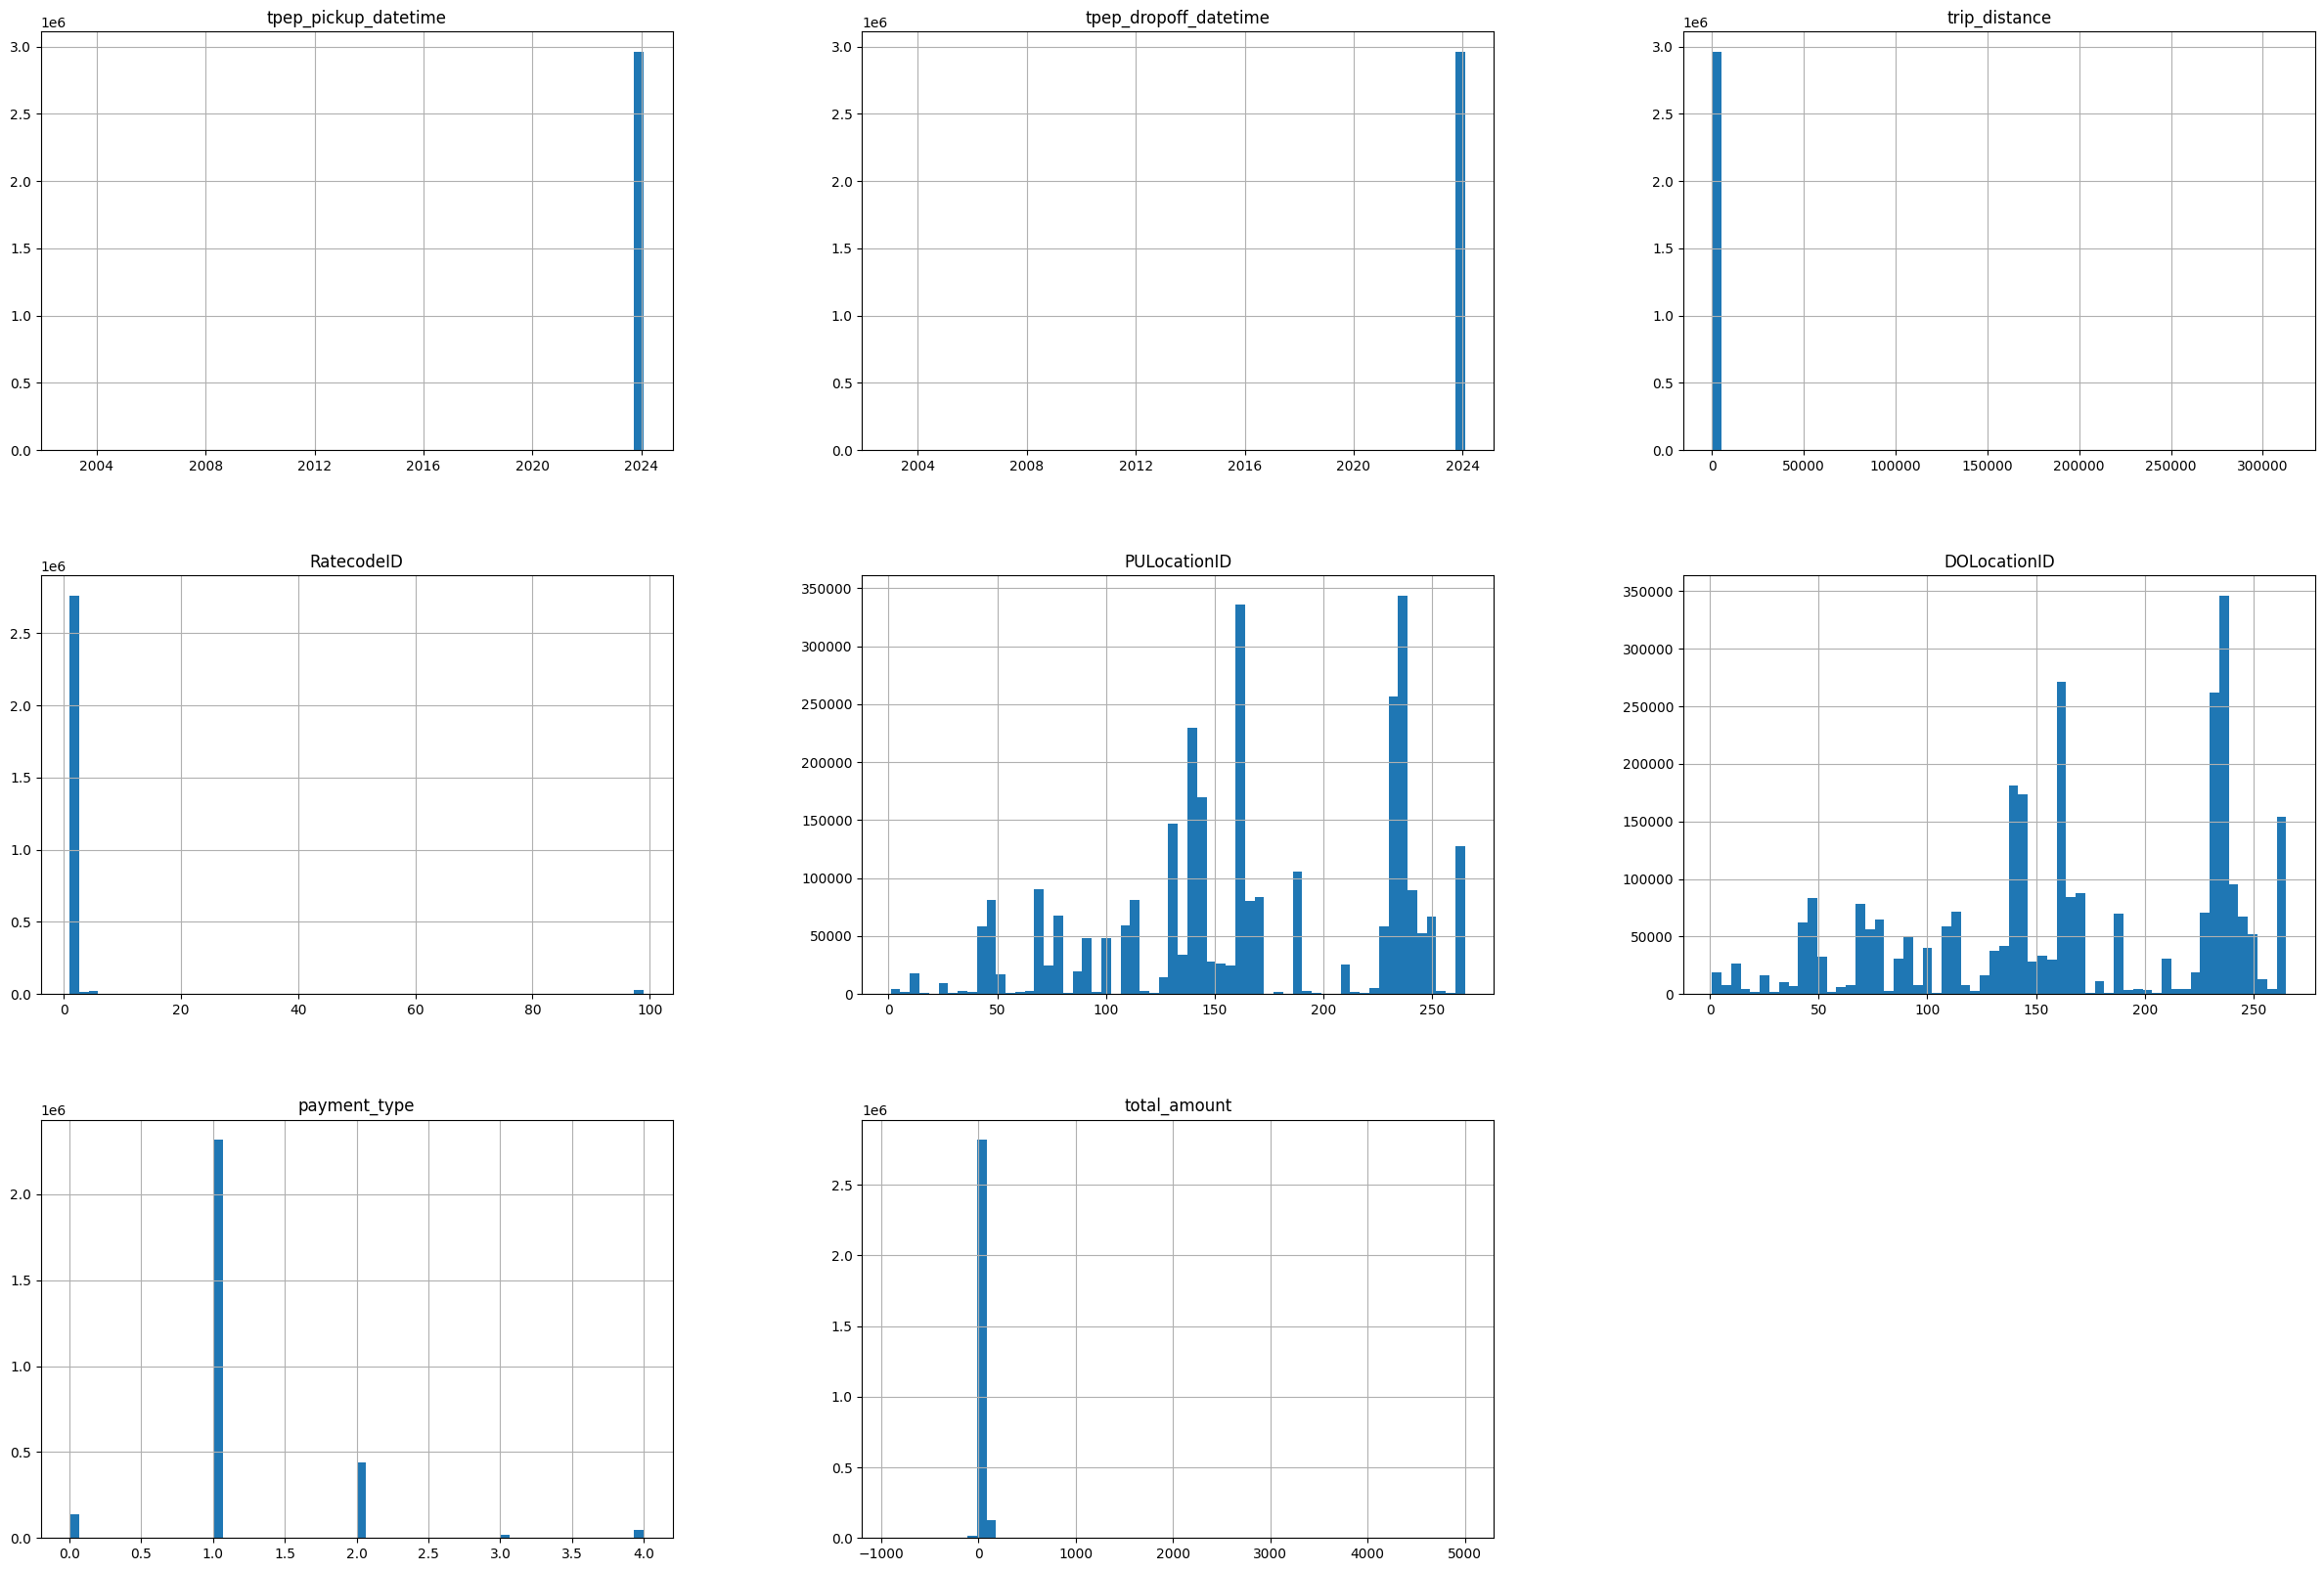

In [79]:
taxi_dataframe.hist(figsize=(30,20), bins=60)

There are columns that need some fixing:
- RatecodeID column, according to the pdf, only have six possible ID's. But we see different values.
- Negative values values in total_amount
- Years that are not 2024 and months different from january
- Huge trip distances or too low trip_distances convined with unproportional total_amount
- Doesn't appear graphically but there are NaN/null cells

In [80]:
taxi_dataframe['RatecodeID'].value_counts()

RatecodeID
1.0     2663350
2.0       98713
99.0      28663
5.0       19410
3.0        7954
4.0        6365
6.0           7
Name: count, dtype: int64

#### Wrong data in column RatecodeID

A 99 was marked 28663 times as rate code.
- Context: RatecodeID is a column that indicates the type of fare applied, with a defined set of valid values.
- Action: Records with RatecodeID values that did not belong to the expected set were identified and removed.
- Impact: Ensures that all records in the dataset have recognized fare codes, enabling accurate analysis of fares by type.

In [81]:
wrong_ratecode = taxi_dataframe[taxi_dataframe['RatecodeID'] > 6].shape[0]
total_data = taxi_dataframe.shape[0]

wrong_ratecode_percent = (wrong_ratecode / total_data) * 100
print(f'Número de campos erroneos en ratecode: {wrong_ratecode} \nPercentage of wronk RatecodeID over total of rows: {wrong_ratecode_percent:.3f}%')

Número de campos erroneos en ratecode: 28663 
Percentage of wronk RatecodeID over total of rows: 0.967%


#### Null or NaN data
- Context: The presence of null or NaN values in any key column could lead to incomplete or incorrect results in the analysis.
- Action: All records containing null or NaN values in essential columns were removed.
- Impact: This step ensures that all records in the dataset are complete and valid for analysis.

In [82]:
null_data = taxi_dataframe.isna().sum().sum()

null_percent = (null_data / total_data) * 100
print(f'NaN/null data: {null_data} \nPercentage of NaN/null data over total of rows: {null_percent:.3f}%')

NaN/null data: 140162 
Percentage of NaN/null data over total of rows: 4.728%


All Nan/null data seems to be located in RatecodeID column

In [83]:
wrong_ratecode_data = wrong_ratecode_percent + null_percent

print(f'Total incorrect data: {wrong_ratecode + null_data}')
print(f'Total over the column: {(((wrong_ratecode + null_data) / total_data) * 100):.3f}%')

f'Total of unwanted data in RatecodeId: {wrong_ratecode_data:.3f}%'

Total incorrect data: 168825
Total over the column: 5.695%


'Total of unwanted data in RatecodeId: 5.695%'

#### Negatives values in column total_amount.
- Context: Records with negative values were found in the total_amount column, which is inconsistent with the logic of the data (since a negative fare doesn’t make sense).
- Action: All records with negative values in total_amount were removed.
- Impact: This prevents distortion in future analyses, as these negative values do not reflect real fares.

In [84]:
negative_values = taxi_dataframe[taxi_dataframe['total_amount'] < 0].shape[0]
negative_values_percent = (negative_values / total_data) * 100

negative_values_column = (negative_values / total_data) * 100

print(f"Negative percentage in 'total_amount': {negative_values_column:.2f}%")

Negative percentage in 'total_amount': 1.20%


Cleaning wrong data and null data in RatecodeID, and drop negative values in total_amount

In [85]:
taxi_dataframe_filtered = taxi_dataframe[(taxi_dataframe['RatecodeID'] <= 6) & (taxi_dataframe['total_amount'] > 0)]

taxi_dataframe_filtered = taxi_dataframe_filtered.dropna()

print('''Data cleaning so far: ''')
print(taxi_dataframe_filtered['RatecodeID'].value_counts())
print('''\nDatos negativos en total_amount''')
print(taxi_dataframe_filtered[taxi_dataframe_filtered['total_amount'] < 0].shape[0])
print(f'\nCampos nulos: \n{taxi_dataframe_filtered.isnull().sum()}')

Data cleaning so far: 
RatecodeID
1.0    2630858
2.0      96658
5.0      18640
3.0       7617
4.0       6144
6.0          5
Name: count, dtype: int64

Datos negativos en total_amount
0

Campos nulos: 
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
total_amount             0
dtype: int64


In [86]:
print(f'Datos originales: {taxi_dataframe.shape}')

print(f'Datos filtrados: {taxi_dataframe_filtered.shape}')

Datos originales: (2964624, 8)
Datos filtrados: (2759922, 8)


Changing the data types of RatecodeID, PULocationID, DOLocationID, payment_type columns.

In [87]:
for column in taxi_dataframe_filtered.columns:
    if 'ID' in column or 'payment_type' in column:
        taxi_dataframe_filtered.loc[:,column] = taxi_dataframe_filtered[column].astype('str')


C:\Users\dario.maroto\AppData\Local\Temp\ipykernel_3152\2506915822.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['1.0' '1.0' '1.0' ... '1.0' '1.0' '1.0']' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  taxi_dataframe_filtered.loc[:,column] = taxi_dataframe_filtered[column].astype('str')
C:\Users\dario.maroto\AppData\Local\Temp\ipykernel_3152\2506915822.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['186' '140' '236' ... '43' '142' '140']' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  taxi_dataframe_filtered.loc[:,column] = taxi_dataframe_filtered[column].astype('str')
C:\Users\dario.maroto\AppData\Local\Temp\ipykernel_3152\2506915822.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of panda

In [88]:
taxi_dataframe_filtered.dtypes

tpep_pickup_datetime     datetime64[us]
tpep_dropoff_datetime    datetime64[us]
trip_distance                   float64
RatecodeID                       object
PULocationID                     object
DOLocationID                     object
payment_type                     object
total_amount                    float64
dtype: object

In [89]:
taxi_dataframe_filtered

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,total_amount
0,2024-01-01 00:57:55,2024-01-01 01:17:43,1.72,1.0,186,79,2,22.70
1,2024-01-01 00:03:00,2024-01-01 00:09:36,1.80,1.0,140,236,1,18.75
2,2024-01-01 00:17:06,2024-01-01 00:35:01,4.70,1.0,236,79,1,31.30
3,2024-01-01 00:36:38,2024-01-01 00:44:56,1.40,1.0,79,211,1,17.00
4,2024-01-01 00:46:51,2024-01-01 00:52:57,0.80,1.0,211,148,1,16.10
...,...,...,...,...,...,...,...,...
2824457,2024-01-31 23:10:28,2024-01-31 23:18:30,3.51,1.0,138,129,1,30.31
2824458,2024-01-31 23:01:04,2024-01-31 23:17:35,3.36,1.0,162,261,1,29.25
2824459,2024-01-31 23:08:13,2024-01-31 23:25:00,3.30,1.0,43,249,1,23.70
2824460,2024-01-31 23:49:46,2024-01-31 23:53:10,0.40,1.0,142,163,2,10.10


#### Let's see again the dataframe graphically

array([[<Axes: title={'center': 'tpep_pickup_datetime'}>,
        <Axes: title={'center': 'tpep_dropoff_datetime'}>],
       [<Axes: title={'center': 'trip_distance'}>,
        <Axes: title={'center': 'total_amount'}>]], dtype=object)

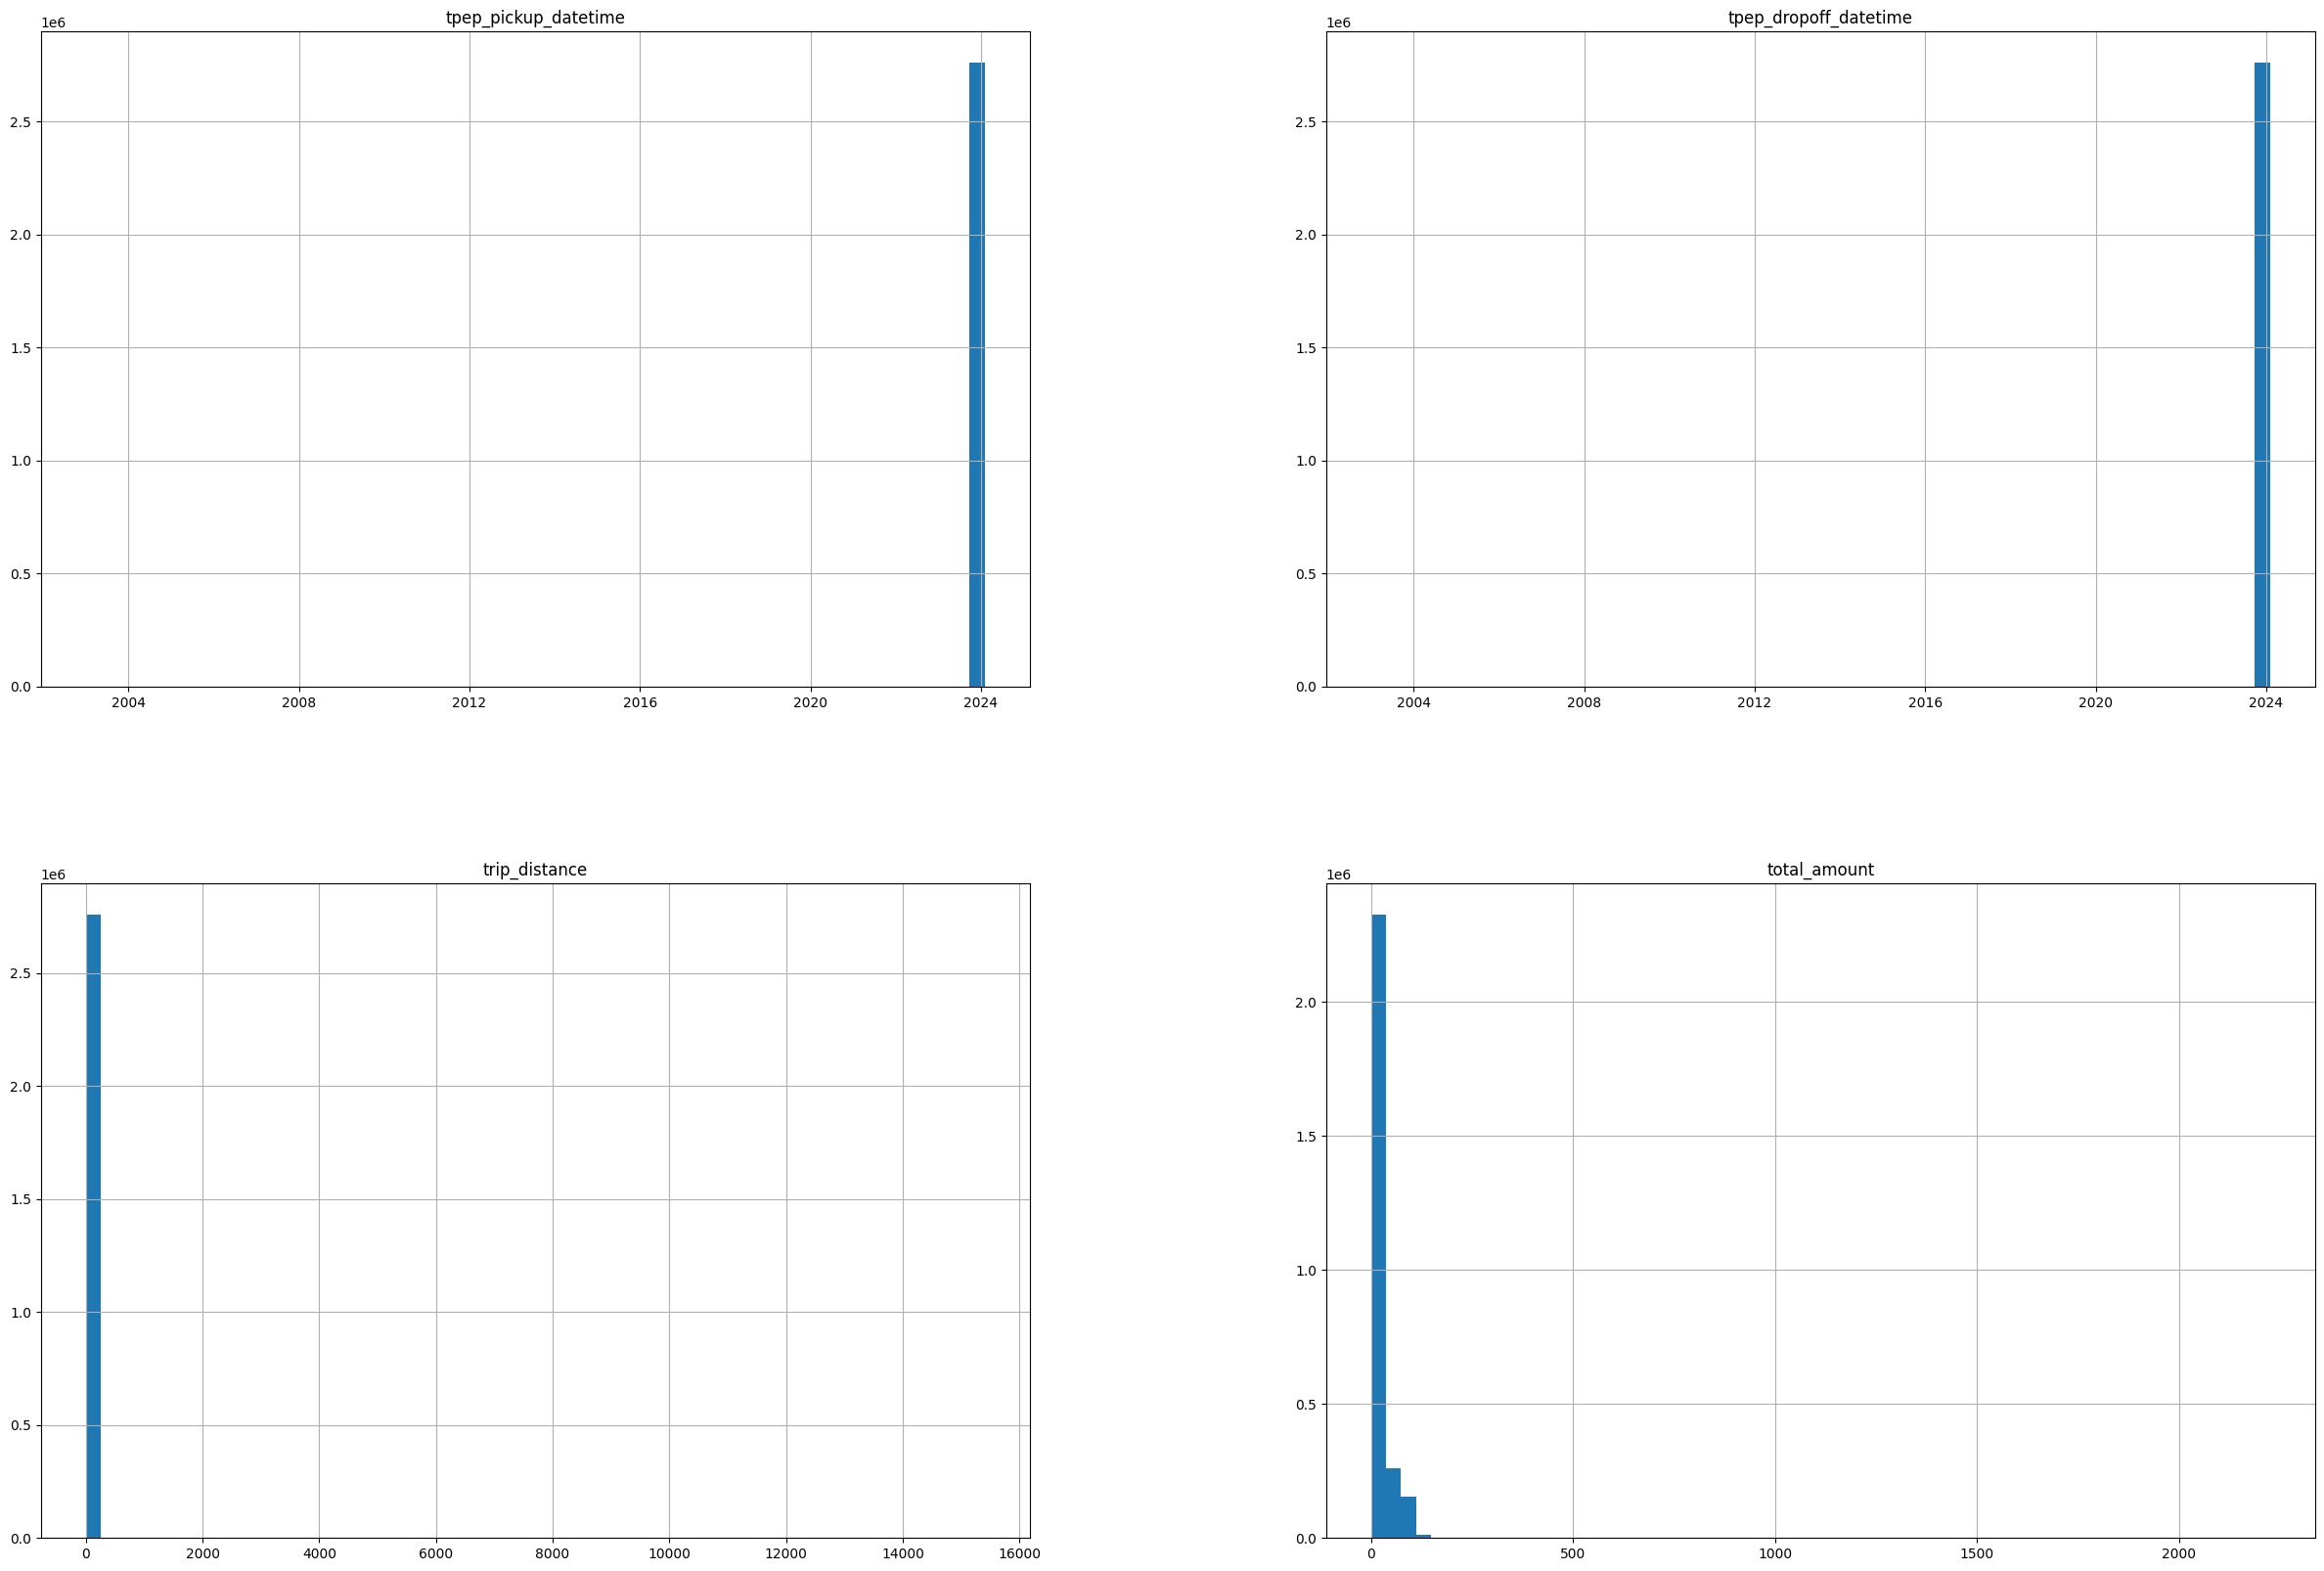

In [90]:
taxi_dataframe_filtered.hist(figsize=(30,20), bins=60)

### Linear relation between trip distance and total amount showing outliers
Observe the poor correlation between trip distance and amount

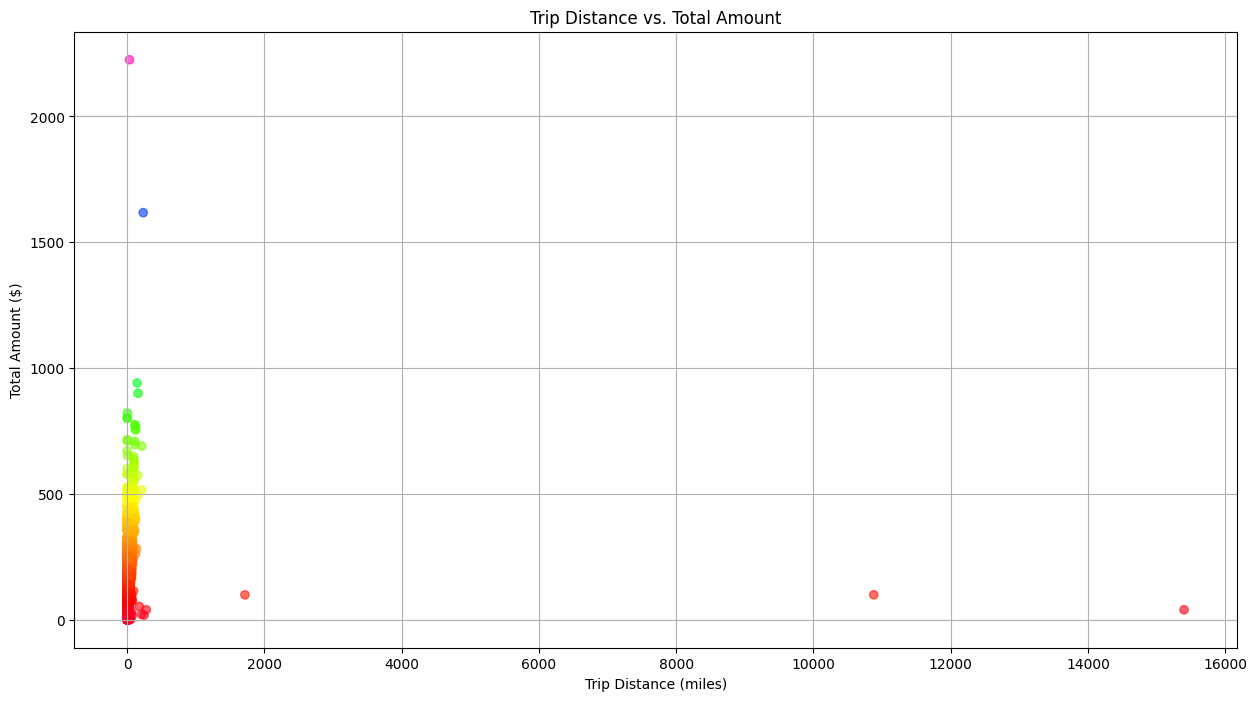

Descriptive Statistics:
        trip_distance  total_amount
count   2.759922e+06  2.759922e+06
mean    3.209680e+00  2.742040e+01
std     1.220827e+01  2.239270e+01
min     0.000000e+00  1.000000e-02
25%     1.000000e+00  1.540000e+01
50%     1.660000e+00  2.002000e+01
75%     3.040000e+00  2.850000e+01
max     1.540032e+04  2.225300e+03
Correlation between trip distance and total amount: 0.33


In [103]:
matplot.figure(figsize=(15, 8))
matplot.scatter(taxi_dataframe_filtered['trip_distance'], taxi_dataframe_filtered['total_amount'], alpha=0.6, c=taxi_dataframe_filtered['total_amount'], cmap=matplot.get_cmap('gist_rainbow'))
matplot.title('Trip Distance vs. Total Amount')
matplot.xlabel('Trip Distance (miles)')
matplot.ylabel('Total Amount ($)')
matplot.grid(True)
matplot.show()

# 2. Cálculo de Estadísticas Descriptivas
stats = taxi_dataframe_filtered[['trip_distance', 'total_amount']].describe()
print("Descriptive Statistics:\n", stats)

# 3. Análisis de Correlación
correlation = taxi_dataframe_filtered[['trip_distance', 'total_amount']].corr().iloc[0, 1]
print(f"Correlation between trip distance and total amount: {correlation:.2f}")


## Dealing and cleaning remaining problems in dataframe

- Context: The original dataset included data from different years and months.
- Action: The data was filtered to retain only records corresponding to January 2024.
- Impact: This step ensures that the analysis is specific to the period of interest, excluding data that is not relevant to the current investigation.

In [ ]:
not_2024 = taxi_dataframe_filtered.loc[
  taxi_dataframe_filtered['tpep_pickup_datetime'].dt.year < 2024, ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
  ]

not_january = taxi_dataframe_filtered.loc[
  taxi_dataframe_filtered['tpep_pickup_datetime'].dt.month > 1, 
  ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
  ]

print(f"Años diferentes a 2024: \n {not_2024} \n")

print(f"Meses distintos de enero: \n{not_january} \n")

Años diferentes a 2024: 
         tpep_pickup_datetime tpep_dropoff_datetime
256      2023-12-31 23:56:46   2024-01-01 00:12:06
369      2023-12-31 23:39:17   2023-12-31 23:42:00
753      2023-12-31 23:41:02   2023-12-31 23:48:03
2210     2023-12-31 23:57:17   2024-01-01 00:01:50
2615     2023-12-31 23:56:45   2024-01-01 00:00:28
2985     2023-12-31 23:49:12   2024-01-01 00:04:32
3176     2023-12-31 23:47:28   2023-12-31 23:57:07
4137     2023-12-31 23:58:35   2024-01-01 00:13:06
4142     2023-12-31 23:58:37   2024-01-01 00:08:37
8628     2023-12-31 23:54:27   2024-01-01 00:13:12
10915    2009-01-01 23:58:40   2009-01-02 00:01:40
53120    2002-12-31 22:59:39   2002-12-31 23:05:41
1230169  2009-01-01 23:30:39   2009-01-02 00:01:39
2558056  2009-01-01 00:24:09   2009-01-01 01:13:00 

Meses distintos de enero: 
        tpep_pickup_datetime tpep_dropoff_datetime
256      2023-12-31 23:56:46   2024-01-01 00:12:06
369      2023-12-31 23:39:17   2023-12-31 23:42:00
753      2023-12-31 23:41:0

The new variable "taxi_data_prep" contains only data of January 2024

In [ ]:
taxi_data_prep = taxi_dataframe_filtered.drop(
  taxi_dataframe_filtered[
  (taxi_dataframe_filtered['tpep_pickup_datetime'].dt.year != 2024)
  ].index)

taxi_data_prep = taxi_data_prep.drop(
  taxi_data_prep[
    (taxi_data_prep['tpep_pickup_datetime'].dt.month > 1) |
    (taxi_dataframe_filtered['tpep_dropoff_datetime'].dt.month > 1)
    ].index)

print('---- Months different to January ----')
print(taxi_data_prep.loc[
  ((taxi_data_prep['tpep_pickup_datetime'].dt.month > 1) &
    (taxi_dataframe_filtered['tpep_dropoff_datetime'].dt.month > 1)),
  ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
  ])

print('---- Years different to 2024 ---- ')
print(taxi_data_prep.loc[
  (taxi_data_prep['tpep_pickup_datetime'].dt.year != 2024), 
  # &(taxi_dataframe_filtered['tpep_pickup_datetime'].dt.month > 1),
  ['tpep_pickup_datetime', 'tpep_dropoff_datetime']
  ])

C:\Users\dario.maroto\AppData\Local\Temp\ipykernel_3152\3736536068.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  taxi_data_prep[


---- Months different to January ----
Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime]
Index: []
---- Years different to 2024 ---- 
Empty DataFrame
Columns: [tpep_pickup_datetime, tpep_dropoff_datetime]
Index: []


## Manual removal of Outliers in Trip Distance and Total Amount.
- Context: Outliers were defined as records where the total fare (total_amount) and trip distance (trip_distance) were excessively high or excessivley low relative to each other.
- Action: To clean the dataset, these outliers were removed by applying the Interquartile Range (IQR) method. Specifically, for each distance range, the first quartile (Q1) and third quartile (Q3) of the total fare were calculated, and any records with fares falling outside the range of [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] were considered outliers and removed. This method ensured that only fares within a reasonable range relative to their corresponding trip distances were retained.
- Impact:  The removal of outliers led to a reduction of 13.55% in the dataset size. This indicates that a modest but significant portion of the data consisted of atypical or potentially erroneous records. Cleaning the data in this way helps improve the reliability and accuracy of subsequent analyses, as it reduces the influence of extreme values that could skew the results.

In [ ]:
def calculate_thresholds(df, column, multiplier=2):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    
    return lower_bound, upper_bound

# Calculate thresholds for total_amount and trip_distance
lower_amount, upper_amount = calculate_thresholds(taxi_data_prep, 'total_amount')
lower_distance, upper_distance = calculate_thresholds(taxi_data_prep, 'trip_distance')

# Display the thresholds
print(f"Thresholds for total_amount: Lower = {lower_amount:.2f}, \nUpper = {upper_amount:.2f}")
print(f"Thresholds for trip_distance: Lower = {lower_distance:.2f}, \nUpper = {upper_distance:.2f}")

# Filter the data to remove outliers
taxi_df_cleaned = taxi_data_prep[
    (taxi_data_prep['total_amount'] >= lower_amount) & (taxi_data_prep['total_amount'] <= upper_amount) &
    (taxi_data_prep['trip_distance'] >= lower_distance) & (taxi_data_prep['trip_distance'] <= upper_distance)
]

with_outliers = taxi_data_prep.shape[0]
without_outliers = taxi_df_cleaned.shape[0]

# Display the shape of the original and cleaned data
print(f"Original datasetset shape: {with_outliers}")
print(f"Cleaned dataset shape: {without_outliers}")
print(f"Percent of outliers: {((with_outliers - without_outliers )/ with_outliers) * 100:.2f}%")

Thresholds for total_amount: Lower = -10.78, 
Upper = 54.67
Thresholds for trip_distance: Lower = -3.08, 
Upper = 7.12
Original datasetset shape: 2759316
Cleaned dataset shape: 2428351
Percent of outliers: 11.99%


### Linear relation between trip distance and total amount after cleaning outliers
Showing how correlation is stronger now.

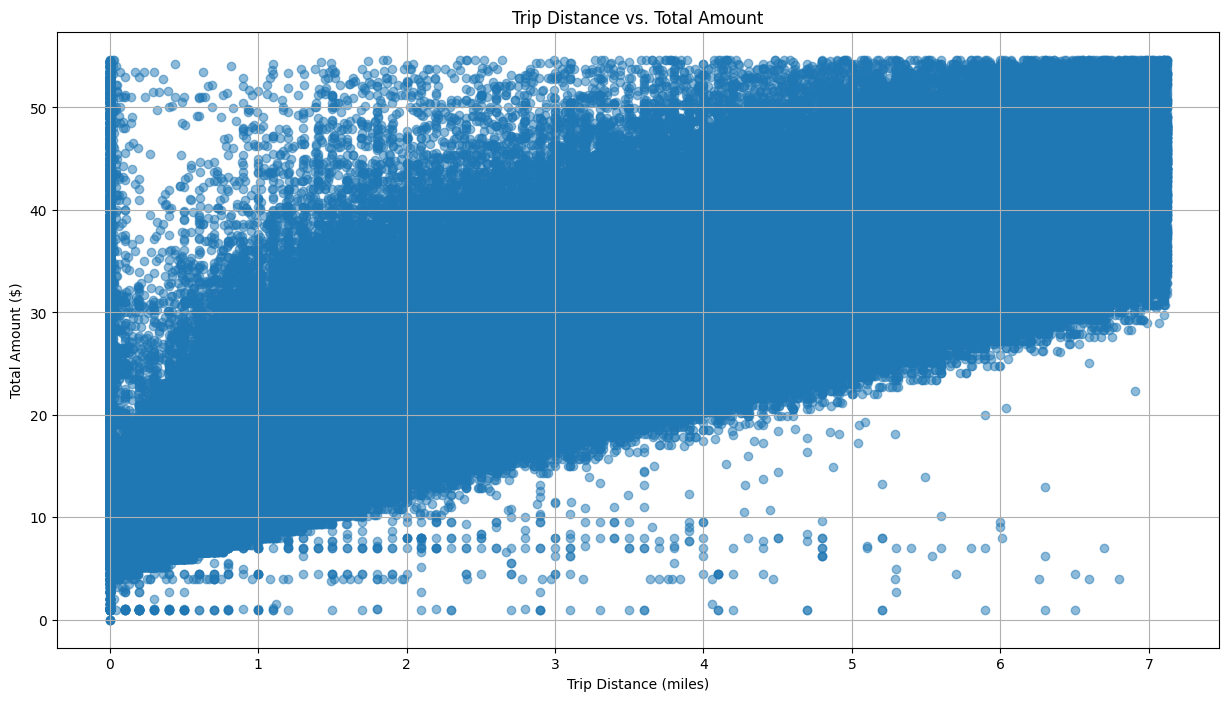

Descriptive Statistics:
        trip_distance  total_amount
count   2.428351e+06  2.428351e+06
mean    1.854156e+00  2.047476e+01
std     1.319704e+00  7.749101e+00
min     0.000000e+00  1.000000e-02
25%     9.300000e-01  1.495000e+01
50%     1.500000e+00  1.881000e+01
75%     2.370000e+00  2.436000e+01
max     7.120000e+00  5.466000e+01
Correlation between trip distance and total amount: 0.87


In [ ]:
matplot.figure(figsize=(15, 8))
matplot.scatter(taxi_df_cleaned['trip_distance'], taxi_df_cleaned['total_amount'], alpha=0.5)
matplot.title('Trip Distance vs. Total Amount')
matplot.xlabel('Trip Distance (miles)')
matplot.ylabel('Total Amount ($)')
matplot.grid(True)
matplot.show()

# 2. Cálculo de Estadísticas Descriptivas
stats = taxi_df_cleaned[['trip_distance', 'total_amount']].describe()
print("Descriptive Statistics:\n", stats)

# 3. Análisis de Correlación
correlation = taxi_df_cleaned[['trip_distance', 'total_amount']].corr().iloc[0, 1]
print(f"Correlation between trip distance and total amount: {correlation:.2f}")


The next figure may take more than a minute to show

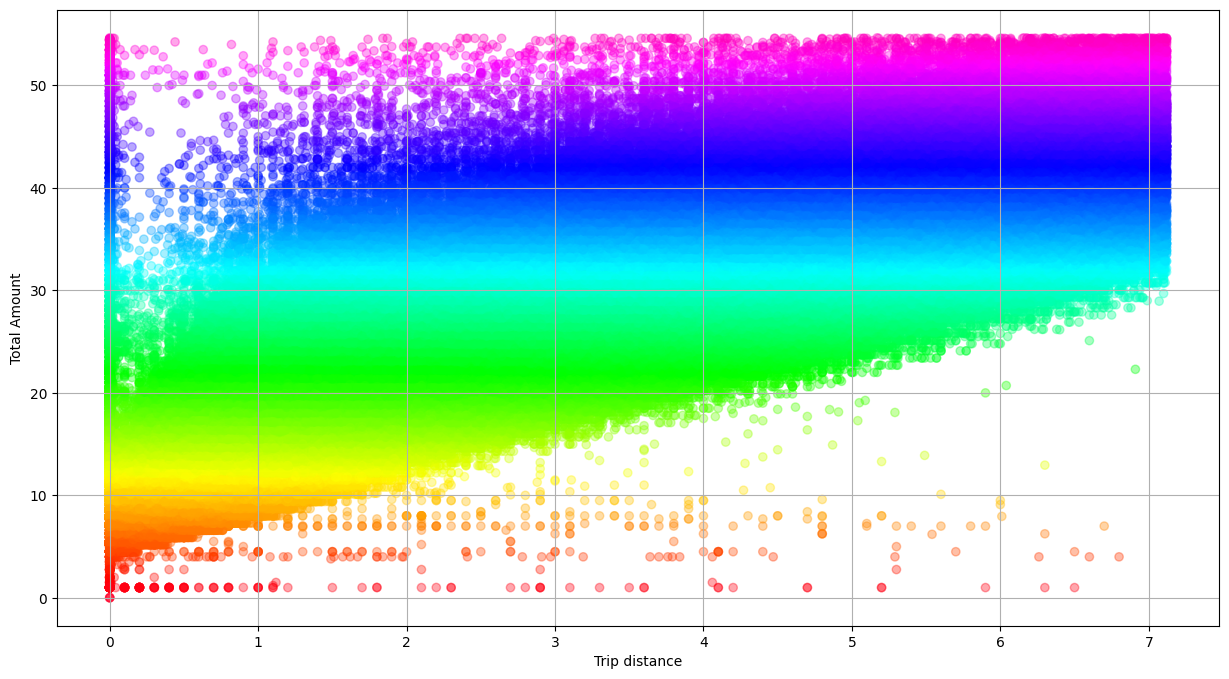

In [107]:
matplot.figure(figsize=(15,8))
matplot.scatter(taxi_df_cleaned['trip_distance'], taxi_df_cleaned['total_amount'], alpha=0.35, c=taxi_df_cleaned['total_amount'], cmap=matplot.get_cmap('gist_rainbow'))
matplot.xlabel('Trip distance')
matplot.ylabel('Total Amount')

matplot.grid(True)
matplot.show()

### Daily and monthly average spent in January

In [ ]:
daily_mean = taxi_df_cleaned.groupby(taxi_df_cleaned['tpep_pickup_datetime'].dt.day)['total_amount'].mean()
print("Daily average spent in January:")
for day, avg in daily_mean.items():
    print(f"Day {day}: ${avg:.2f}")

# Calcular el gasto promedio diario
average_month_spent = daily_mean.mean()
print(f"Complete month average spent in January is: {average_month_spent:.2f}")

Daily average spent in January:
Day 1: $29.61
Day 2: $29.42
Day 3: $27.83
Day 4: $26.84
Day 5: $26.08
Day 6: $24.83
Day 7: $27.57
Day 8: $27.10
Day 9: $25.02
Day 10: $26.39
Day 11: $27.24
Day 12: $27.12
Day 13: $25.14
Day 14: $25.81
Day 15: $27.49
Day 16: $27.63
Day 17: $26.56
Day 18: $26.32
Day 19: $25.41
Day 20: $23.80
Day 21: $26.51
Day 22: $27.16
Day 23: $26.18
Day 24: $26.23
Day 25: $26.89
Day 26: $26.26
Day 27: $24.48
Day 28: $26.02
Day 29: $27.15
Day 30: $25.74
Day 31: $25.91
Complete month average spent in January is: 26.51


### Number of trips per day

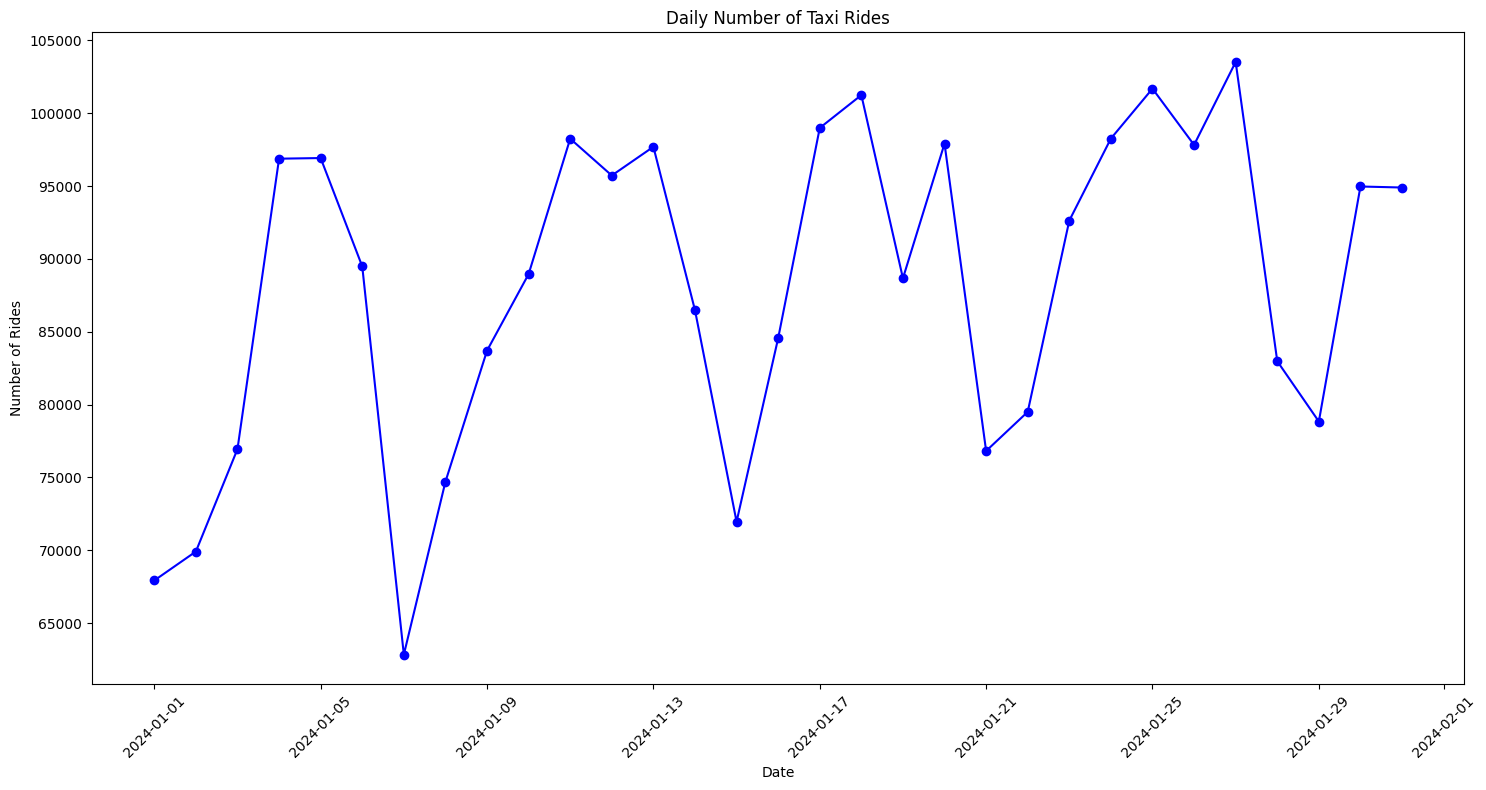

In [ ]:
# Agrupar por día y contar el número de viajes
daily_rides = taxi_df_cleaned.groupby(taxi_df_cleaned['tpep_pickup_datetime'].dt.date).size()

# Visualizar el número de viajes por día
daily_rides.plot(title='Daily Number of Taxi Rides', xlabel='Date', ylabel='Number of Rides', figsize=(15, 8), marker='o', linestyle='-', color='b')
matplot.xticks(rotation=45)  # Rote las etiquetas de fecha para que se muestren claramente
matplot.tight_layout()
matplot.show()

In [ ]:
# taxi_df_cleaned.hist(figsize=(30,20), bins=60)

## Analysis of Pickup Locations and Temporal Patterns
##### Context
This analysis explores pickup location patterns in a taxi dataset, examining how the popularity of different locations varies by day of the week.
##### Methodology
- Grouping and Counting: Grouped data by PULocationID and day, then counted the number of pickups at each location.
- Top Locations: Identified the top 5 pickup locations for each day by sorting the counts and selecting the most frequent ones.
- Visualization: Created bar charts to display the top pickup locations for each day, illustrating variations in pickup frequency.
##### Findings
- Daily Variations: Pickup location popularity varies across different days. Specific locations emerge as top picks on certain days, reflecting fluctuating demand.
- Top Locations: The top 5 and top 10 pickup locations for each day were identified, highlighting which locations are most frequently used.
##### Conclusion
The analysis provides insights into how pickup location preferences change throughout the week, offering useful information for optimizing taxi services and understanding passenger behavior.

In [ ]:
pulocation_counts = taxi_df_cleaned['PULocationID'].value_counts()
print(f'Top 5 pick-up location: {pulocation_counts.head(5)}')
print(f'Top 10 pick-up location: {pulocation_counts.head(10)}')

print(f"The most common Pick Up Location is {pulocation_counts.idxmax()} with {pulocation_counts.max()} pick-ups.")

Top 5 pick-up location: PULocationID
237    137511
161    136444
236    129990
132    128643
162    102535
Name: count, dtype: int64
Top 10 pick-up location: PULocationID
237    137511
161    136444
236    129990
132    128643
162    102535
186    101166
230     99817
142     99191
138     86453
239     82626
Name: count, dtype: int64
The most common Pick Up Location is 237 with 137511 pick-ups.


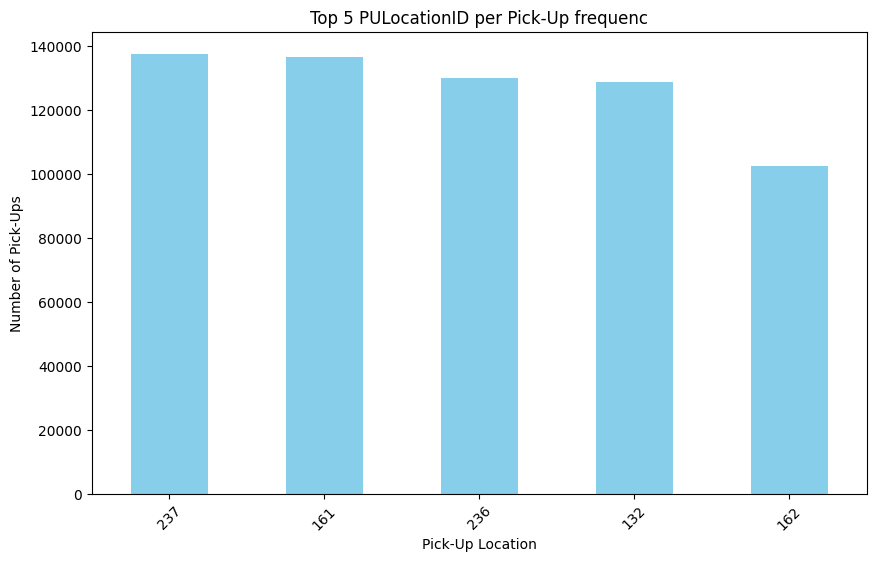

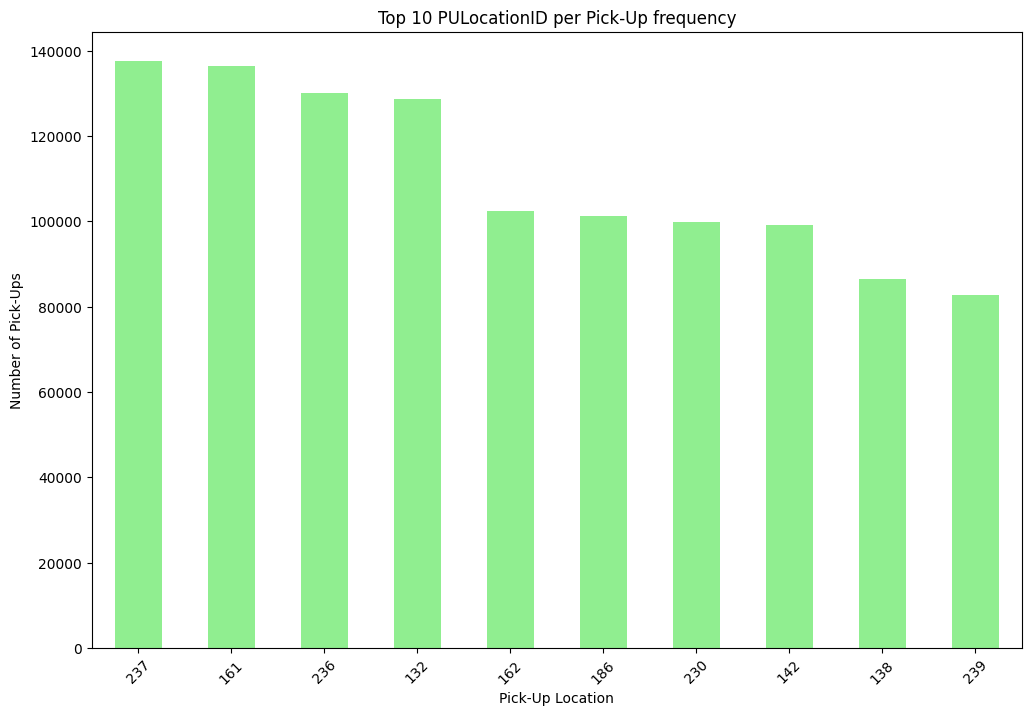

In [ ]:
matplot.figure(figsize=(10, 6))
pulocation_counts.head(5).plot(kind='bar', color='skyblue')
matplot.title('Top 5 PULocationID per Pick-Up frequenc')
matplot.xlabel('Pick-Up Location')
matplot.ylabel('Number of Pick-Ups')
matplot.xticks(rotation=45)
matplot.show()

# Visualizar el Top 10
matplot.figure(figsize=(12, 8))
pulocation_counts.head(10).plot(kind='bar', color='lightgreen')
matplot.title('Top 10 PULocationID per Pick-Up frequency')
matplot.xlabel('Pick-Up Location')
matplot.ylabel('Number of Pick-Ups')
matplot.xticks(rotation=45)
matplot.show()

In [ ]:
# Extract day of the week
taxi_df_cleaned['day_of_week'] = taxi_df_cleaned['tpep_pickup_datetime'].dt.day_name()

# Group by PULocationID and day of week
daily_pulocation_counts = taxi_df_cleaned.groupby(['day_of_week', 'PULocationID']).size().reset_index(name='counts')

top_daily_pulocation = (daily_pulocation_counts
                        .sort_values(['day_of_week', 'counts'], ascending=[True, False])
                        .groupby('day_of_week')
                        .head(5))

print("Top 5 Pick-Up Location per day of week:")
print(top_daily_pulocation)

C:\Users\dario.maroto\AppData\Local\Temp\ipykernel_3152\3079811247.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_no_outliers['day_of_week'] = taxi_no_outliers['tpep_pickup_datetime'].dt.day_name()


Top 5 Pick-Up Location per day of week:
     day_of_week PULocationID  counts
126       Friday          237   19731
125       Friday          236   18968
56        Friday          161   17363
27        Friday          132   15589
38        Friday          142   14553
246       Monday          132   23504
275       Monday          161   18931
354       Monday          237   18807
353       Monday          236   17910
251       Monday          138   15426
487     Saturday          142   16169
575     Saturday          237   15849
477     Saturday          132   14996
648     Saturday           79   14908
574     Saturday          236   14801
692       Sunday          132   18392
786       Sunday          230   12386
698       Sunday          138   11885
792       Sunday          236   11482
793       Sunday          237   11229
943     Thursday          161   22899
1015    Thursday          237   22038
1014    Thursday          236   20143
944     Thursday          162   16925
914     Th

In [ ]:
taxi_df_cleaned['hour_of_day'] = taxi_df_cleaned['tpep_pickup_datetime'].dt.hour

hourly_pulocation_counts = taxi_df_cleaned.groupby(['hour_of_day', 'PULocationID']).size().reset_index(name='counts')

# Top 5 PULocationID by hour
top_hourly_pulocation = (hourly_pulocation_counts
                        .sort_values(['hour_of_day', 'counts'], ascending=[True, False])
                        .groupby('hour_of_day')
                        .head(5))

print("Top 5 PULocationID por Hora del Día:")
print(top_hourly_pulocation)

C:\Users\dario.maroto\AppData\Local\Temp\ipykernel_3152\1705811343.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taxi_df_cleaned['hour_of_day'] = taxi_df_cleaned['tpep_pickup_datetime'].dt.hour


Top 5 PULocationID por Hora del Día:
      hour_of_day PULocationID  counts
143             0           79    4792
100             0          249    4289
7               0          114    3552
123             0           48    2606
33              0          148    2377
...           ...          ...     ...
3783           23          249    4884
3709           23          142    4434
3767           23          230    4430
3822           23           79    4253
3806           23           48    3885

[120 rows x 3 columns]


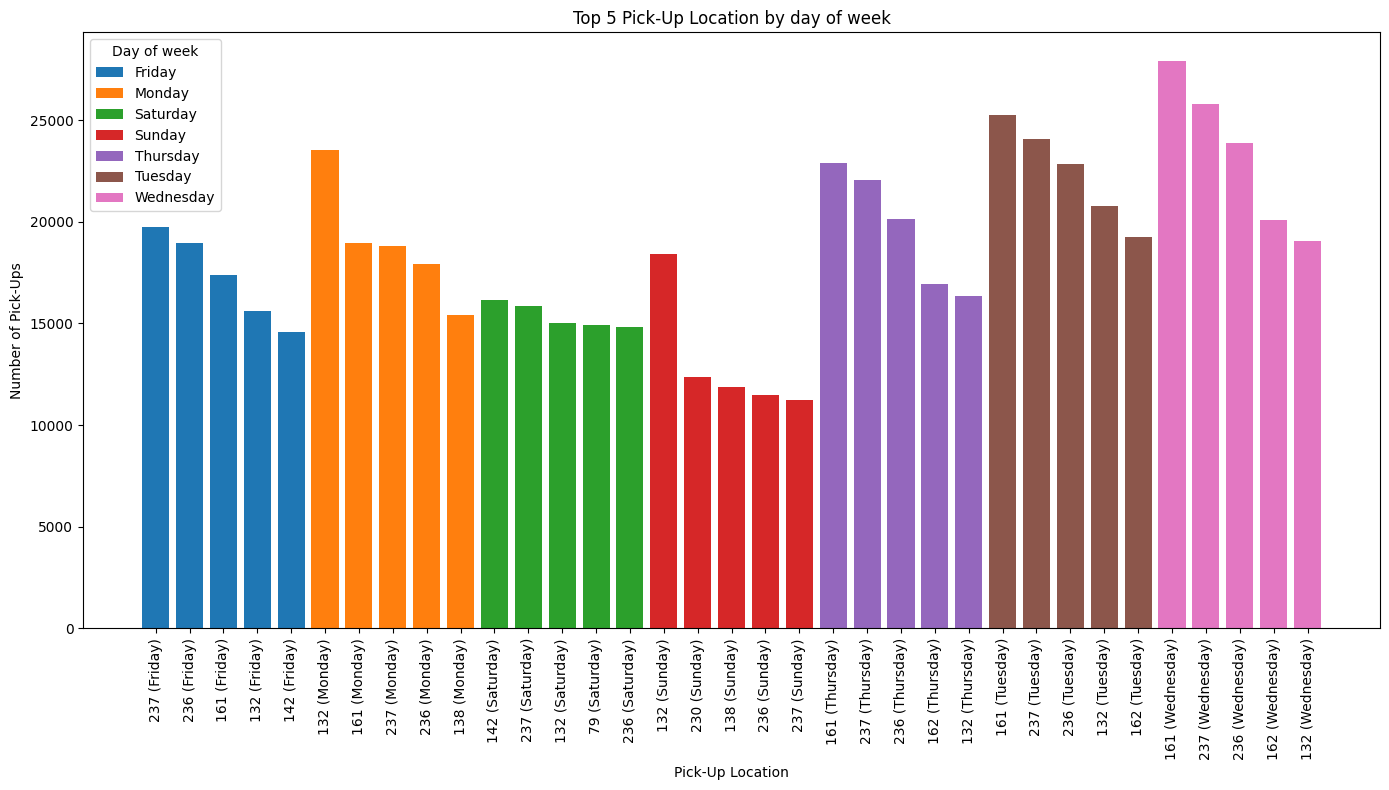

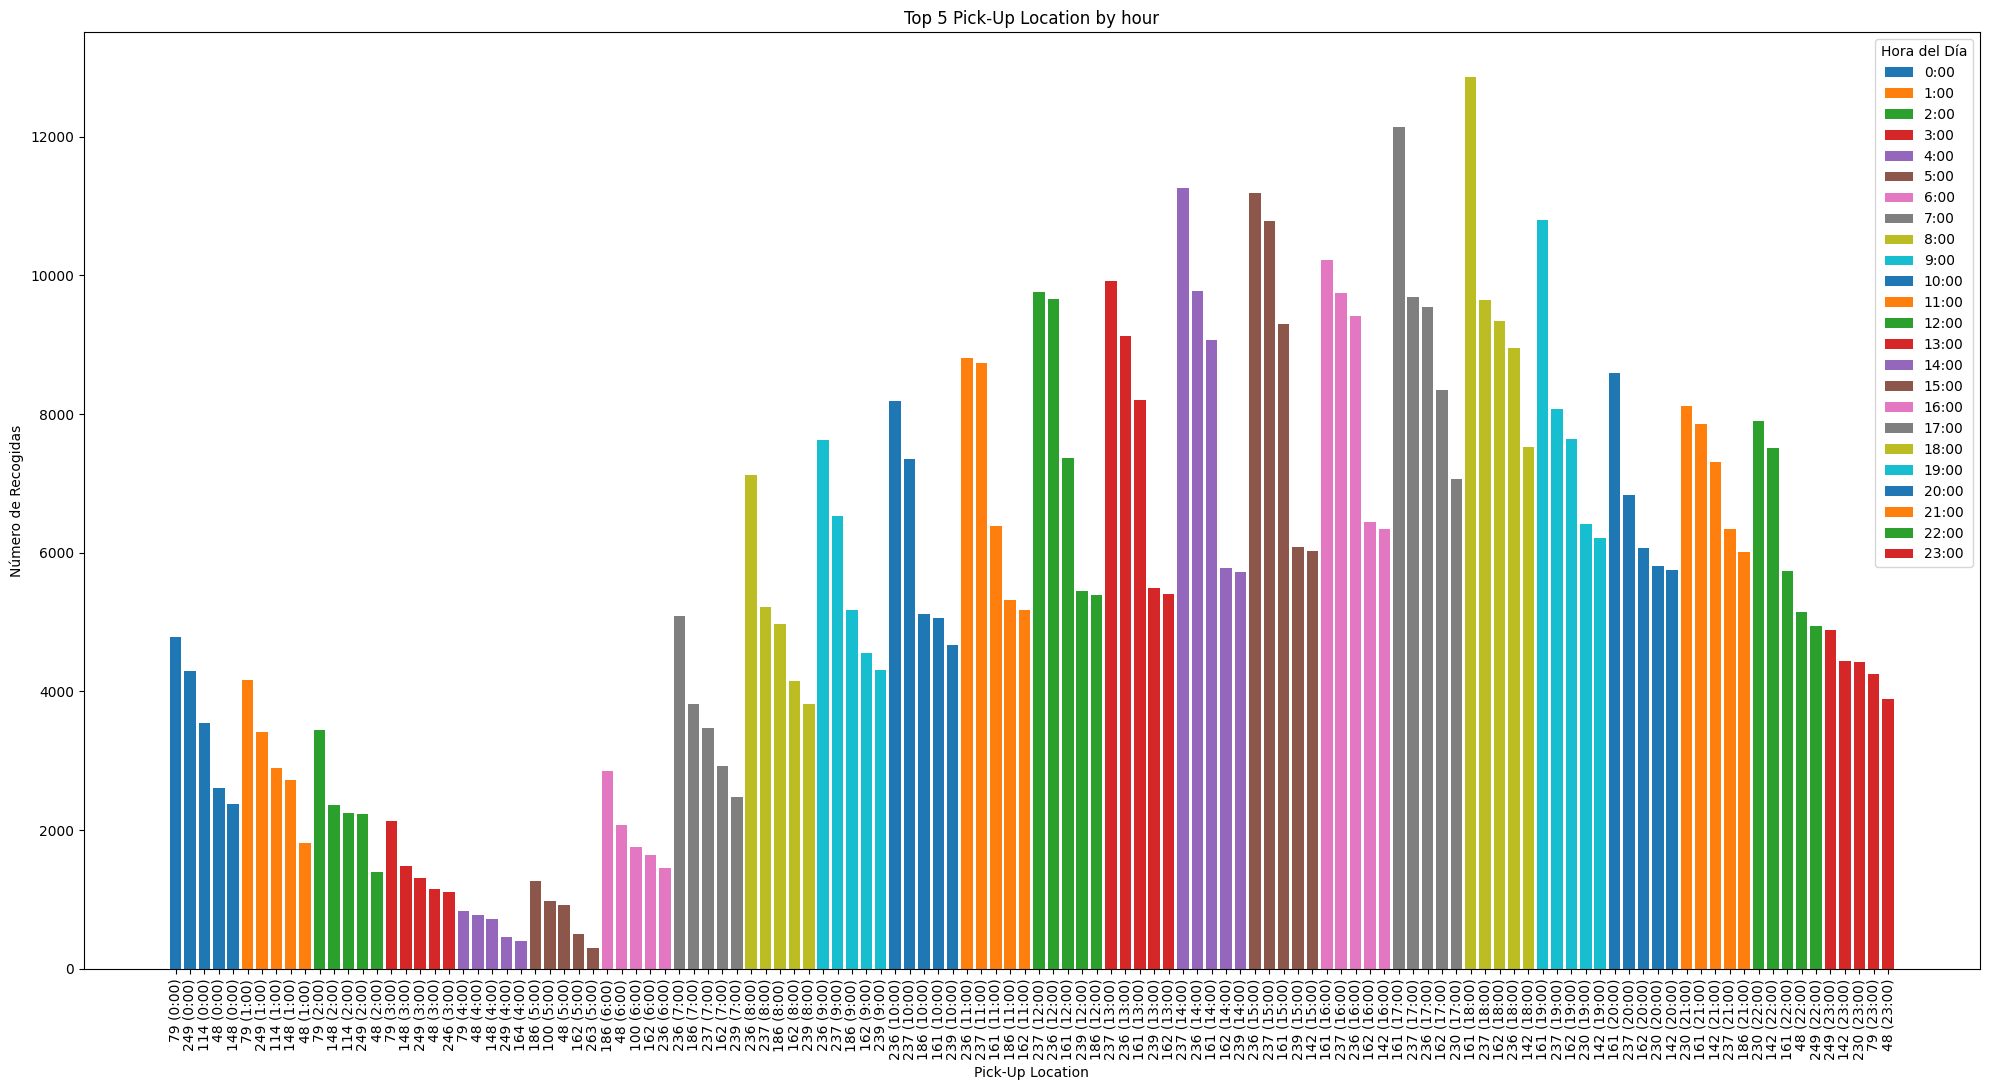

In [ ]:
matplot.figure(figsize=(14, 8))
for day in top_daily_pulocation['day_of_week'].unique():
    subset = top_daily_pulocation[top_daily_pulocation['day_of_week'] == day]
    matplot.bar(subset['PULocationID'].astype(str) + ' (' + subset['day_of_week'] + ')', subset['counts'], label=day)

matplot.title('Top 5 Pick-Up Location by day of week')
matplot.xlabel('Pick-Up Location')
matplot.ylabel('Number of Pick-Ups')
matplot.xticks(rotation=90)
matplot.legend(title='Day of week')
matplot.tight_layout()
matplot.show()

# Visualiza el Top 5 PULocationID por cada hora del día
matplot.figure(figsize=(20, 11))
for hour in top_hourly_pulocation['hour_of_day'].unique():
    subset = top_hourly_pulocation[top_hourly_pulocation['hour_of_day'] == hour]
    matplot.bar(subset['PULocationID'].astype(str) + ' (' + subset['hour_of_day'].astype(str) + ':00)', subset['counts'], label=f'{hour}:00')

matplot.title('Top 5 Pick-Up Location by hour')
matplot.xlabel('Pick-Up Location')
matplot.ylabel('Número de Recogidas')
matplot.xticks(rotation=90)
matplot.legend(title='Hora del Día')
matplot.tight_layout()
matplot.show()